# Pandas Data Manipulation and Visualization

Pandas data exercise from Youtube video by Ian Ozsvald: "A gentle introduction to Pandas timeseries and Seaborn" delivered at PyData London 2019

In [1]:
import pandas as pd

In [2]:
pd.to_datetime(['2017-12-27'])

DatetimeIndex(['2017-12-27'], dtype='datetime64[ns]', freq=None)

Get data from https://open-power-system-data.org/

In [3]:
opsd = pd.read_csv("opsd_germany_daily.csv", header=0)
# Convert dates, because pandas does not seem to do this correctly.
opsd['Date'] = pd.to_datetime(opsd['Date'])
opsd.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [4]:
opsd.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [5]:
opsd = opsd.set_index('Date')
opsd.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [6]:
opsd.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [7]:
opsd.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [8]:
opsd['Year'] = opsd.index.year
opsd['Month'] = opsd.index.month
opsd['Weekday Name'] = opsd.index.day_name()
opsd['Weekday'] = opsd.index.weekday
opsd['Is Weekend'] = opsd['Weekday'].isin((5,6))
opsd.tail()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,3,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,4,False
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,5,True
2017-12-31,1107.11488,721.176,19.980,741.156,2017,12,Sunday,6,True


In [9]:
opsd.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,
2006-01-19,1558.290,NaN,NaN,NaN,2006,1,Thursday,3,False
2010-07-13,1370.114,34.162,NaN,NaN,2010,7,Tuesday,1,False
2007-02-12,1464.080,NaN,NaN,NaN,2007,2,Monday,0,False
2013-05-06,1299.818,63.526,157.684,221.210,2013,5,Monday,0,False
2014-05-17,1206.499,68.244,135.701,203.945,2014,5,Saturday,5,True


In [10]:
opsd['Weekday'].value_counts()

6    627
3    626
2    626
5    626
1    626
4    626
0    626
Name: Weekday, dtype: int64

In [11]:
opsd.describe()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
count,4383.000000,2920.000000,2188.000000,2187.000000,4383.000000,4383.000000,4383.000000
mean,1338.675836,164.814173,89.258695,272.663481,2011.500342,6.522930,3.000684
std,165.775710,143.692732,58.550099,146.319884,3.452347,3.449097,2.000513
min,842.395000,5.757000,1.968000,21.478000,2006.000000,1.000000,0.000000
25%,1217.859000,62.353250,35.179250,172.185500,2008.500000,4.000000,1.000000
50%,1367.123000,119.098000,86.407000,240.991000,2012.000000,7.000000,3.000000
75%,1457.761000,217.900250,135.071500,338.988000,2014.500000,10.000000,5.000000
max,1709.568000,826.278000,241.580000,851.556000,2017.000000,12.000000,6.000000


In [12]:
opsd.loc['2017-12-27':'2017-12-29']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,3,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,4,False


In [13]:
opsd.loc['2017-12']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,
2017-12-01,1592.96187,52.323,19.266,71.589,2017,12,Friday,4,False
2017-12-02,1391.85405,126.274,16.459,142.733,2017,12,Saturday,5,True
2017-12-03,1330.26226,387.490,12.411,399.901,2017,12,Sunday,6,True
2017-12-04,1620.97758,479.798,10.747,490.545,2017,12,Monday,0,False
2017-12-05,1643.72307,611.488,10.953,622.441,2017,12,Tuesday,1,False
2017-12-06,1639.08265,632.501,7.618,640.119,2017,12,Wednesday,2,False
2017-12-07,1628.47979,743.725,42.994,786.719,2017,12,Thursday,3,False
2017-12-08,1618.05658,652.830,20.504,673.334,2017,12,Friday,4,False
2017-12-09,1415.34531,712.317,12.344,724.661,2017,12,Saturday,5,True


In [14]:
import matplotlib.pyplot as plt
# Display figures inline. 
%matplotlib inline

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

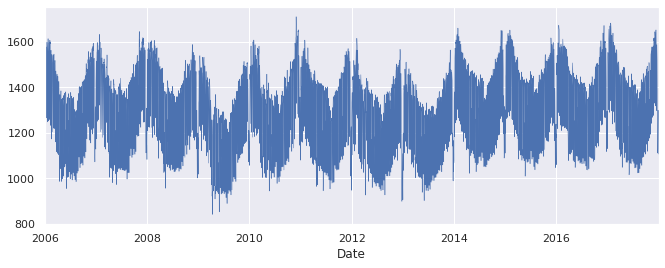

In [16]:
opsd['Consumption'].plot(linewidth=0.5)

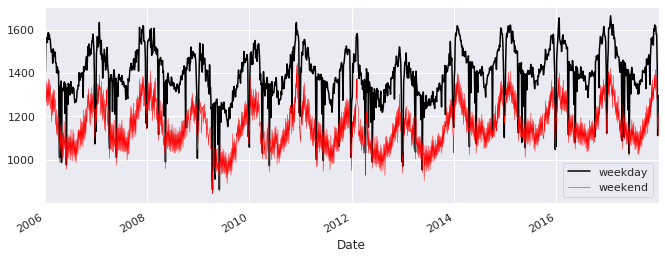

In [17]:
# Split out weekends and weekdays.
weekends = opsd.loc[opsd['Weekday'].isin([5,6])]
weekdays = opsd.loc[opsd['Weekday'].isin([0,4])]
weekdays['Consumption'].plot(linewidth=1.5, label='weekday', color='black')
weekends['Consumption'].plot(linewidth=0.5, label='weekend', color='red')
plt.legend()

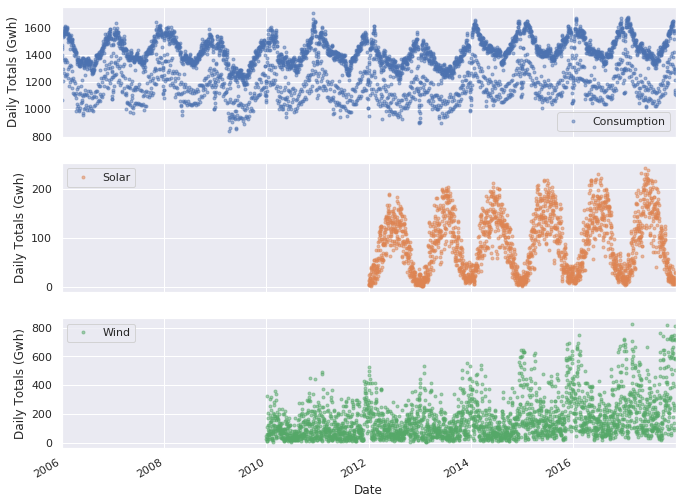

In [18]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (Gwh)')

Text(0.5, 1.0, '2017 Consumption by Day')

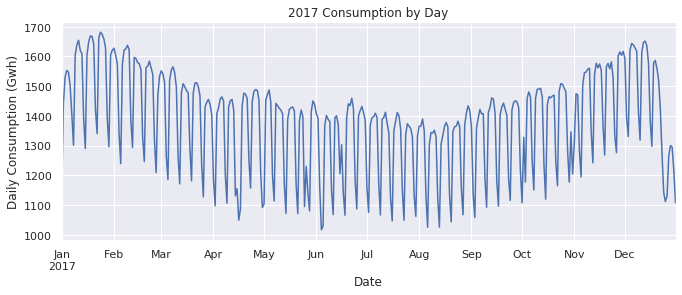

In [19]:
ax = opsd.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (Gwh)')
ax.set_title('2017 Consumption by Day')

In [20]:
s2017 = opsd.loc['2017', ['Month', 'Consumption']]
s2017.tail(2)

,Month,Consumption
Date,,
2017-12-30,12,1215.44897
2017-12-31,12,1107.11488


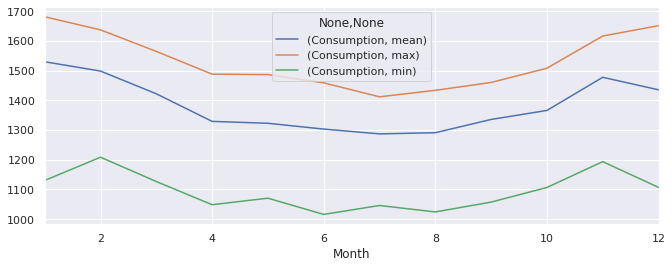

In [21]:
ax = s2017.groupby('Month').agg(['mean', 'max', 'min']).plot()

Text(0, 0.5, 'Daily Consumption (Gwh)')

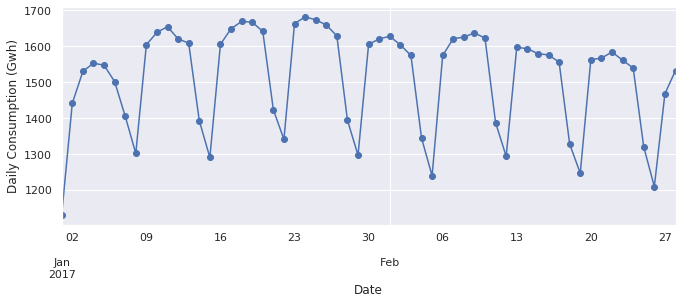

In [22]:
ax = opsd.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (Gwh)')

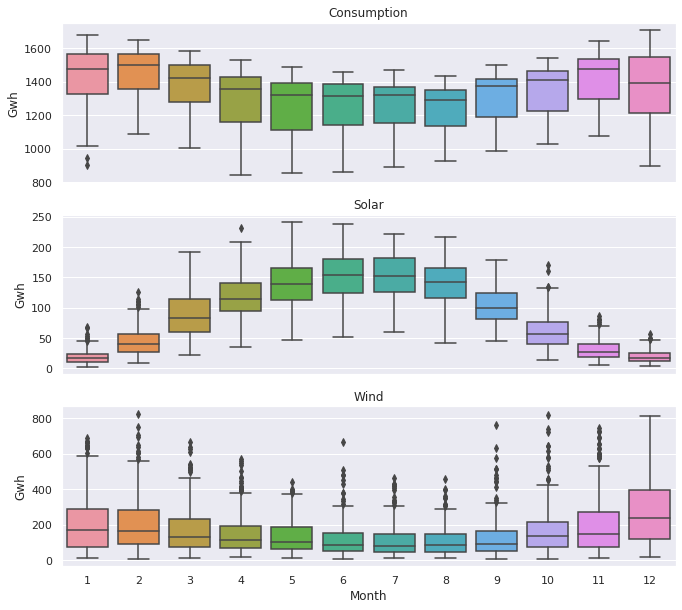

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd, x='Month', y=name, ax=ax)
    ax.set_ylabel('Gwh')
    ax.set_title(name)
    # Remove all but last x axis label.
    if ax != axes[-1]:
        ax.set_xlabel('')

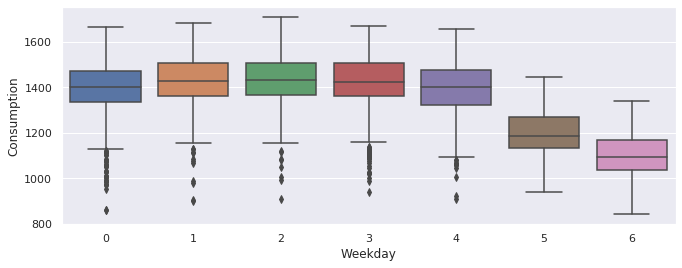

In [24]:
sns.boxplot(data=opsd, x='Weekday', y='Consumption')

(0, 360)

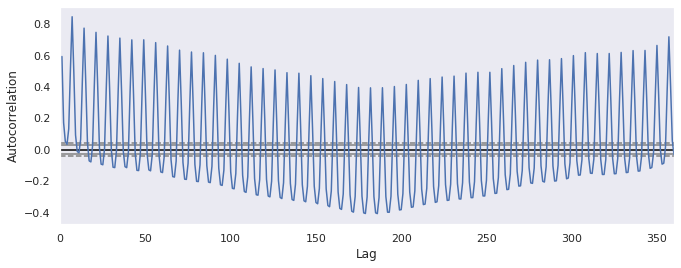

In [25]:
from pandas.plotting import autocorrelation_plot
fig, ax = plt.subplots()
autocorrelation_plot(opsd.Consumption, ax=ax)
ax.set_xlim(0, 360)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


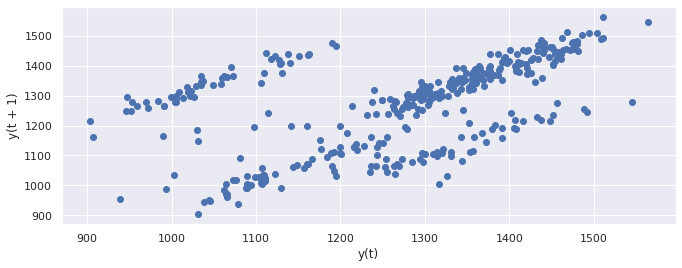

In [26]:
from pandas.plotting import lag_plot
data = opsd.loc['2013']
lag_plot(data['Consumption'])

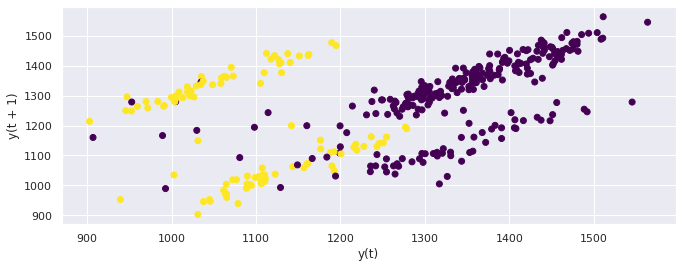

In [27]:
# Split the lag plot values between weekend and weekday
lag_plot(data['Consumption'], c=data['Is Weekend'][:-1], cmap='viridis')

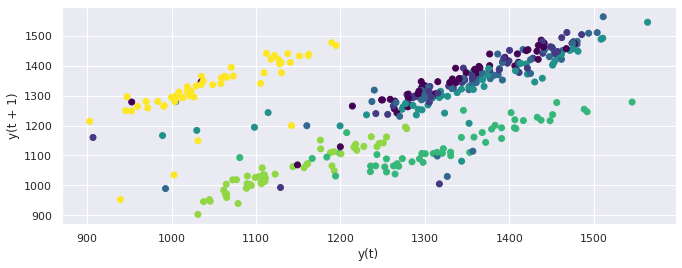

In [28]:
lag_plot(data['Consumption'], c=data['Weekday'][:-1], cmap='viridis')

In [35]:
# Downsampling - Resample data to weekly frequency using mean to aggregate.  
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd[data_columns].resample('W').mean()
opsd_weekly_mean.tail(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


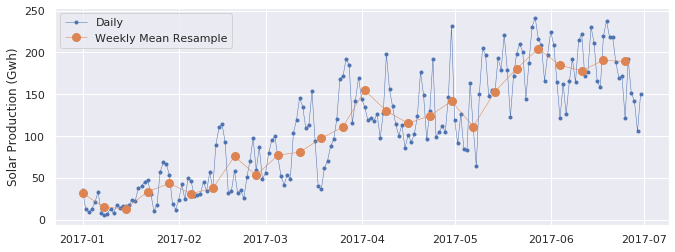

In [36]:
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled data.
fig, ax = plt.subplots()
ax.plot(opsd.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', 
        linewidth=0.5, label='Weekly Mean Resample')
ax.set_ylabel("Solar Production (Gwh)")
ax.legend()

In [39]:
# Compute 7-day rolling average. 
opsd_7d = opsd[data_columns].rolling(7, center=False).mean()
opsd_7d.head(8)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN
2006-01-07,1361.471429,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN


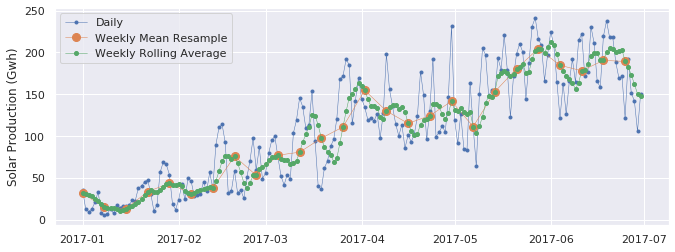

In [45]:
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled data.
fig, ax = plt.subplots()
ax.plot(opsd.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', 
        linewidth=0.5, label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'], marker='.', markersize=8, linestyle='-', 
        linewidth=0.5, label='Weekly Rolling Average')
ax.set_ylabel("Solar Production (Gwh)")
ax.legend()

In [47]:
# Compute ratio of green power to consumption.
opsd['Green Fraction'] = opsd['Wind+Solar'] / opsd['Consumption']
opsd.tail()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Weekday,Is Weekend,Green Fraction
Date,,,,,,,,,,
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2,False,0.325203
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,3,False,0.400493
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,4,False,0.474200
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,5,True,0.599543
2017-12-31,1107.11488,721.176,19.980,741.156,2017,12,Sunday,6,True,0.669448


In [55]:
# Recompute 7-day rolling average. 
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar','Green Fraction']
opsd_7d = opsd[data_columns].rolling(7, center=False).mean()
opsd_7d.head(8)

,Consumption,Wind,Solar,Wind+Solar,Green Fraction
Date,,,,,
2006-01-01,NaN,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN
2006-01-07,1361.471429,NaN,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN,NaN


In [61]:
# Compute 30-day rolling average. 
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar','Green Fraction']
opsd_30d = opsd[data_columns].rolling(30, center=False).mean()
opsd_30d.tail(5)

,Consumption,Wind,Solar,Wind+Solar,Green Fraction
Date,,,,,
2017-12-27,1480.999567,429.109500,16.027833,445.137333,0.311069
2017-12-28,1470.482346,428.825933,15.844633,444.670567,0.313387
2017-12-29,1460.185785,444.980067,16.034600,461.014667,0.326621
2017-12-30,1446.799648,466.808667,15.806367,482.615033,0.344942
2017-12-31,1430.604748,489.103767,15.830167,504.933933,0.365759


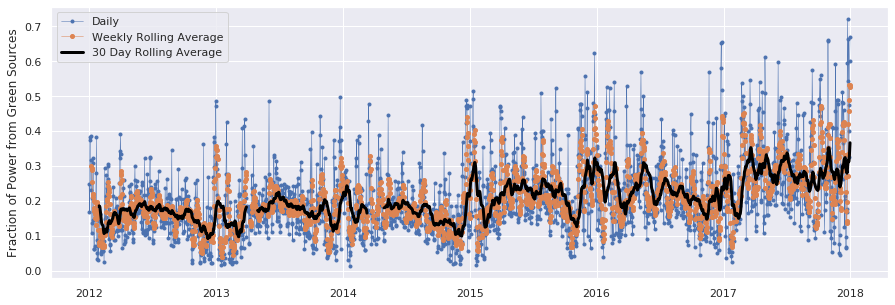

In [68]:
start, end = '2012-01', '2017-12'
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(opsd.loc[start:end, 'Green Fraction'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_7d.loc[start:end, 'Green Fraction'], marker='.', markersize=8, linestyle='-', 
        linewidth=0.5, label='Weekly Rolling Average')
ax.plot(opsd_30d.loc[start:end, 'Green Fraction'], linestyle='-', color='black',
        linewidth=3.0, label='30 Day Rolling Average')
ax.set_ylabel("Fraction of Power from Green Sources")
ax.legend()